In [1]:
!pip install gdown  # Ensure gdown is installed

In [2]:
import gdown

# Replace FILE_ID with your actual file ID
file_id = "18DAkuOwK2K_wPSofWqpXbGKPVp_LqoTo"
output_file = "Person_Segmentation_Datasets.zip"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output_file, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=18DAkuOwK2K_wPSofWqpXbGKPVp_LqoTo
From (redirected): https://drive.google.com/uc?id=18DAkuOwK2K_wPSofWqpXbGKPVp_LqoTo&confirm=t&uuid=182c9d52-b77b-428e-add7-7f6f6b366a9a
To: /content/Person_Segmentation_Datasets.zip
100%|██████████| 123M/123M [00:01<00:00, 78.5MB/s]


'Person_Segmentation_Datasets.zip'

In [3]:
import zipfile
z = zipfile.ZipFile('/content/Person_Segmentation_Datasets.zip')
z.extractall()

In [4]:
import os
import shutil

src = 'Person_Segmentation_Datasets'
dst_dir = 'datasets'
dst = os.path.join(dst_dir, src)

# Create 'datasets' directory if it doesn't exist
os.makedirs(dst_dir, exist_ok=True)

# If 'pothole_datasets' already exists in 'datasets', remove it
if os.path.exists(dst):
    shutil.rmtree(dst)

# Move 'pothole_datasets' to 'datasets'
shutil.move(src, dst)

print(f"Moved '{src}' to '{dst}' successfully.")


Moved 'Person_Segmentation_Datasets' to 'datasets/Person_Segmentation_Datasets' successfully.


## **Importing libraries**

In [5]:
import yaml

# Define YAML configuration
data = {
    'path': 'Person_Segmentation_Datasets',
    'train': 'train/images',
    'val': 'valid/images',
    'nc': 1,
    'names': ['Person']
}

# Save to pothole.yaml
with open('Person_Segmentation_Datasets.yaml', 'w') as file:
    yaml.dump(data, file, default_flow_style=False)

print("Person_Segmentation_Datasets.yaml created successfully!")


Person_Segmentation_Datasets.yaml created successfully!


In [6]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 46.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 28.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 43.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [7]:
from ultralytics import YOLO

# Load a pretrained YOLOv8 model
model = YOLO('yolov8m-seg.pt')  # 'yolov8s.pt' or 'yolov8m.pt' for better accuracy

# Train the model and save only the best checkpoint
model.train(
    data='Person_Segmentation_Datasets.yaml',
    epochs=50,
    imgsz=640,
    batch=8,
    name='Person_Segmentation_Datasets_yolov8',
    save=True,
    save_period=-1,  # Don't save every epoch
    patience=20,     # Early stopping if no improvement for 20 epochs (optional)
    val=True,     # Run validation during training to select best model

    # Data augmentation parameters
    degrees=10,        # Rotate image ±10 degrees
    translate=0.1,     # Translate image ±10%
    scale=0.5,         # Scale image between 0.5–1.5
    shear=2.0,         # Shear image by ±2 degrees
    perspective=0.001, # Perspective distortion
    flipud=0.5,        # Vertical flip 50% of the time
    fliplr=0.5,        # Horizontal flip 50% of the time
    hsv_h=0.015,       # Hue augmentation
    hsv_s=0.7,         # Saturation augmentation
    hsv_v=0.4          # Value (brightness) augmentation
)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 52.4M/52.4M [00:01<00:00, 43.7MB/s]


Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=Person_Segmentation_Datasets.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.5, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8m-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=Person_Segmentation_Datasets_yolov8, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=20, perspective=0.

100%|██████████| 755k/755k [00:00<00:00, 39.1MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              


  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384, 576, 3, 2]              
  8                  -1  2   3985920  ultralytics.nn.modules.block.C2f             [576, 576, 2, True]           
  9                  -1  1    831168  ultralytics.nn.modules.block.SPPF            [576, 576, 5]                 
 10                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 11             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 12                  -1  2   1993728  ultralytics.nn.modules.block.C2f             [960, 384, 2]                 
 13                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 14             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]  

100%|██████████| 5.35M/5.35M [00:00<00:00, 183MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 27.8±6.5 MB/s, size: 61.0 KB)


train: Scanning /content/datasets/Person_Segmentation_Datasets/train/labels... 1500 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1500/1500 [00:02<00:00, 583.92it/s]

train: /content/datasets/Person_Segmentation_Datasets/train/images/000000026938_jpg.rf.5f26a5b6170d46ac8911d32982c3e810.jpg: 1 duplicate labels removed
train: /content/datasets/Person_Segmentation_Datasets/train/images/000000027005_jpg.rf.57fdcf410739b3a9662794e682ef63e1.jpg: 1 duplicate labels removed
train: /content/datasets/Person_Segmentation_Datasets/train/images/2008_001965_jpg.rf.9646038dee3c4a8b22c62737555edea6.jpg: 1 duplicate labels removed
train: New cache created: /content/datasets/Person_Segmentation_Datasets/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 10.7±6.4 MB/s, size: 49.5 KB)


val: Scanning /content/datasets/Person_Segmentation_Datasets/valid/labels... 267 images, 0 backgrounds, 0 corrupt: 100%|██████████| 267/267 [00:00<00:00, 403.23it/s]

val: /content/datasets/Person_Segmentation_Datasets/valid/images/000000030677_jpg.rf.25220b6a8d0498047efa5fe285caefed.jpg: 1 duplicate labels removed
val: New cache created: /content/datasets/Person_Segmentation_Datasets/valid/labels.cache


Plotting labels to runs/segment/Person_Segmentation_Datasets_yolov8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 86 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/Person_Segmentation_Datasets_yolov8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/50      4.06G      1.459      2.917      1.877      1.508         48        640: 100%|██████████| 188/188 [01:18<00:00,  2.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.75it/s]

                   all        267       1074     0.0229      0.323     0.0137    0.00576     0.0147      0.192    0.00671    0.00227



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.73G      1.839      3.562      2.191      1.812         43        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.92it/s]

                   all        267       1074      0.152      0.178     0.0789     0.0294      0.132      0.155     0.0597     0.0192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.81G      1.887      3.627      2.233      1.828         29        640: 100%|██████████| 188/188 [01:13<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.83it/s]

                   all        267       1074      0.292      0.251      0.197     0.0759      0.288      0.228      0.174     0.0662



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.86G      1.813      3.532      2.174       1.79         66        640:  80%|████████  | 151/188 [00:59<00:14,  2.49it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1238: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
       4/50      4.88G      1.793      3.506       2.16      1.775         20        640: 100%|██████████| 188/188 [01:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.02it/s]

                   all        267       1074      0.334      0.323      0.235     0.0865      0.349      0.301      0.222     0.0824



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.96G      1.733      3.415      2.089      1.728         34        640: 100%|██████████| 188/188 [01:13<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.01it/s]

                   all        267       1074      0.398      0.401      0.305      0.135      0.384      0.363      0.272      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/50      5.03G      1.651      3.299      1.986      1.675         10        640: 100%|██████████| 188/188 [01:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.85it/s]

                   all        267       1074      0.506      0.434      0.403      0.181      0.464      0.377      0.335      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/50       5.1G      1.624      3.217      1.945      1.649         26        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.05it/s]

                   all        267       1074       0.52      0.407      0.403      0.207      0.519      0.381      0.378      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/50      5.18G      1.566      3.134      1.881      1.592         22        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.00it/s]

                   all        267       1074      0.476      0.443      0.413      0.214      0.474      0.415       0.39      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/50      5.57G      1.549      3.079       1.83      1.581         21        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.51it/s]

                   all        267       1074      0.508      0.445      0.434      0.217      0.501      0.418      0.403      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/50      5.65G      1.497      2.992      1.798      1.546         11        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]

                   all        267       1074      0.559      0.429      0.457      0.241      0.533      0.404      0.418      0.197



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/50      5.72G      1.501      2.996       1.79      1.569         34        640: 100%|██████████| 188/188 [01:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.99it/s]

                   all        267       1074      0.529      0.482      0.469      0.234      0.502       0.47      0.452      0.207



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/50       5.8G      1.477      2.937      1.729      1.547         16        640: 100%|██████████| 188/188 [01:13<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.03it/s]

                   all        267       1074      0.548      0.489      0.491      0.269      0.542       0.47      0.473      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/50      5.88G      1.451      2.894      1.723      1.526         20        640: 100%|██████████| 188/188 [01:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]

                   all        267       1074       0.54      0.503      0.494      0.273      0.517      0.473      0.462      0.231



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/50      5.97G      1.407      2.826       1.68      1.482         17        640: 100%|██████████| 188/188 [01:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]

                   all        267       1074      0.629      0.483      0.512      0.284      0.615      0.477      0.499      0.257



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/50       6.1G      1.406      2.794      1.692      1.484         54        640:  28%|██▊       | 52/188 [00:19<00:56,  2.39it/s]/usr/local/lib/python3.11/dist-packages/ultralytics/data/augment.py:1238: RuntimeWarning: divide by zero encountered in divide
  xy = xy[:, :2] / xy[:, 2:3]
      15/50      6.16G      1.389      2.758      1.646      1.487         12        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.04it/s]

                   all        267       1074      0.562      0.516      0.516      0.282      0.554      0.469      0.475      0.236



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/50      6.36G      1.367       2.75      1.632      1.465         31        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.07it/s]

                   all        267       1074      0.618      0.511      0.543      0.297      0.619      0.492      0.522      0.273



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/50      6.68G      1.358      2.738      1.572      1.454         38        640: 100%|██████████| 188/188 [01:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.85it/s]

                   all        267       1074      0.567      0.531      0.547      0.317      0.567      0.497      0.526       0.27



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/50      6.76G      1.315      2.682      1.565      1.427         12        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]

                   all        267       1074      0.625      0.501      0.547      0.317      0.606      0.473      0.514      0.269



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/50      6.83G      1.329      2.703      1.554      1.448         27        640: 100%|██████████| 188/188 [01:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]

                   all        267       1074      0.617      0.543      0.562      0.318      0.568      0.515      0.524      0.268



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/50      6.96G      1.307      2.639      1.518      1.416         12        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.88it/s]

                   all        267       1074      0.658      0.531      0.589      0.332      0.608      0.518      0.559      0.298



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.09G      1.296      2.616      1.509      1.415         31        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]

                   all        267       1074      0.593      0.547      0.561      0.317      0.573       0.53      0.538      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.28G       1.28      2.566      1.477       1.41         15        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]

                   all        267       1074      0.623      0.577      0.596      0.345      0.639      0.501      0.563      0.289



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.82G      1.266      2.536      1.473      1.397         20        640: 100%|██████████| 188/188 [01:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.10it/s]

                   all        267       1074      0.625       0.56      0.583      0.339      0.592      0.541      0.551      0.294



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.82G       1.26      2.526      1.443       1.39         15        640: 100%|██████████| 188/188 [01:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.06it/s]

                   all        267       1074      0.656      0.569      0.613       0.36      0.653      0.561       0.61      0.324



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.82G      1.237      2.492      1.407      1.373          8        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.87it/s]

                   all        267       1074      0.692       0.54      0.618      0.368      0.654      0.514      0.585      0.308



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.91G      1.233      2.477      1.397      1.378         34        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.07it/s]

                   all        267       1074       0.68      0.555      0.613      0.364      0.635      0.551      0.579      0.314



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.98G      1.222      2.481      1.391      1.385         15        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]

                   all        267       1074      0.654      0.557      0.602      0.371      0.631      0.539      0.581      0.322



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/50      5.16G      1.209      2.429        1.4      1.344         15        640: 100%|██████████| 188/188 [01:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.07it/s]

                   all        267       1074      0.702       0.59      0.653      0.387      0.676       0.57      0.624      0.342



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/50      5.16G      1.185      2.404      1.347      1.347         14        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.11it/s]

                   all        267       1074      0.701      0.593      0.658      0.409      0.699      0.575       0.64      0.357



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/50      5.37G      1.194      2.423      1.372       1.36         15        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.05it/s]

                   all        267       1074      0.704      0.609      0.662      0.406       0.69      0.574       0.63      0.352



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/50      5.37G      1.179      2.361      1.329      1.345         49        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.84it/s]

                   all        267       1074      0.744      0.581      0.672      0.402      0.754      0.545      0.651      0.362



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/50      5.37G      1.158      2.299      1.308       1.32         21        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.05it/s]

                   all        267       1074      0.752      0.587      0.669      0.414      0.689      0.587      0.649      0.358



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/50      5.57G      1.158      2.301      1.299      1.345         14        640: 100%|██████████| 188/188 [01:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]

                   all        267       1074      0.702      0.626      0.681      0.418      0.684      0.607      0.659      0.374



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/50      5.64G      1.157      2.326      1.279      1.318         24        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.10it/s]

                   all        267       1074      0.721      0.621      0.691      0.428      0.696      0.613      0.674      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/50       5.8G      1.127      2.273      1.251      1.303         13        640: 100%|██████████| 188/188 [01:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.96it/s]

                   all        267       1074        0.7       0.64      0.688       0.44      0.682      0.622       0.67      0.381



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/50      5.99G       1.13      2.245      1.254      1.307         13        640: 100%|██████████| 188/188 [01:13<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.91it/s]

                   all        267       1074      0.711      0.609      0.674      0.428      0.695      0.595      0.654      0.373



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/50       6.1G      1.093      2.184       1.21      1.288         25        640: 100%|██████████| 188/188 [01:13<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.08it/s]

                   all        267       1074      0.749      0.603      0.697      0.444      0.721       0.58      0.673      0.382



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.35G      1.087      2.167      1.173      1.278         19        640: 100%|██████████| 188/188 [01:13<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.12it/s]

                   all        267       1074      0.713      0.619      0.687      0.443      0.715      0.582      0.671      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.43G       1.08      2.195      1.199       1.28         13        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.96it/s]

                   all        267       1074      0.743       0.63      0.705      0.443      0.722      0.601      0.681      0.391



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.55G      1.068       2.14      1.158       1.26         24        640: 100%|██████████| 188/188 [01:12<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.95it/s]

                   all        267       1074       0.76      0.609      0.698      0.445       0.75      0.605       0.69      0.396


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.81G        1.1      2.204      1.168      1.329         10        640: 100%|██████████| 188/188 [01:13<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.98it/s]

                   all        267       1074      0.707      0.635        0.7      0.453      0.695      0.625      0.687      0.399



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/50      6.88G      1.069      2.117      1.109      1.287         22        640: 100%|██████████| 188/188 [01:12<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.16it/s]

                   all        267       1074      0.757      0.623      0.704      0.457      0.755      0.612      0.699       0.41



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/50      6.98G       1.06      2.097      1.076      1.287          4        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.92it/s]

                   all        267       1074      0.762      0.626      0.707      0.461      0.741      0.629      0.706      0.413



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.29G       1.05      2.053      1.091      1.295          5        640: 100%|██████████| 188/188 [01:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.17it/s]

                   all        267       1074      0.771      0.616      0.716       0.47      0.756      0.604        0.7      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.36G      1.035      2.048      1.061      1.279         10        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.91it/s]

                   all        267       1074      0.781      0.633      0.726      0.475      0.754      0.624       0.71      0.412



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.76G      1.018      2.006      1.033      1.256         21        640: 100%|██████████| 188/188 [01:12<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.05it/s]

                   all        267       1074      0.779      0.626      0.719      0.471       0.75      0.618      0.699      0.414



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.87G      1.001      1.991      1.036      1.249          7        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.98it/s]

                   all        267       1074      0.768      0.637      0.725      0.478      0.755      0.619      0.713      0.421



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/50       5.2G      0.987      1.964     0.9876      1.243         13        640: 100%|██████████| 188/188 [01:11<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  3.19it/s]

                   all        267       1074      0.788       0.63      0.732       0.48      0.768      0.618      0.715      0.426



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/50       5.2G     0.9827      1.968     0.9983      1.241         14        640: 100%|██████████| 188/188 [01:11<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:05<00:00,  2.98it/s]

                   all        267       1074      0.784      0.627      0.726      0.483      0.773      0.616       0.72      0.432



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/50       5.2G     0.9742      1.918     0.9734      1.227         26        640: 100%|██████████| 188/188 [01:11<00:00,  2.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:06<00:00,  2.80it/s]

                   all        267       1074      0.784      0.639      0.736      0.488      0.765      0.625      0.726      0.432



50 epochs completed in 1.160 hours.
Optimizer stripped from runs/segment/Person_Segmentation_Datasets_yolov8/weights/last.pt, 54.8MB
Optimizer stripped from runs/segment/Person_Segmentation_Datasets_yolov8/weights/best.pt, 54.8MB

Validating runs/segment/Person_Segmentation_Datasets_yolov8/weights/best.pt...
Ultralytics 8.3.130 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLOv8m-seg summary (fused): 105 layers, 27,222,963 parameters, 0 gradients, 110.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/17 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   6%|▌         | 1/17 [00:00<00:07,  2.22it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  12%|█▏        | 2/17 [00:01<00:11,  1.36it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 17/17 [00:09<00:00,  1.77it/s]


                   all        267       1074      0.783      0.638      0.736      0.488      0.764      0.626      0.726      0.432
Speed: 0.5ms preprocess, 13.2ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/segment/Person_Segmentation_Datasets_yolov8


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7943480c3150>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [8]:
import numpy as np

def draw_segmentation(image, mask, class_colors):

    # Define transparency level (0 to 1)
    alpha = 0.5  # 50% transparency

    # Create a colored overlay of the same shape as the image
    overlay = np.zeros_like(image, dtype=np.uint8)

    for class_id in range(len(class_colors)):
        if class_id == 0:
            continue  # Skip background class
        class_mask = (mask == class_id)
        color = class_colors[class_id]
        for c in range(3):
            overlay[..., c][class_mask] = color[c]

    # ✅ Fixed: Convert PIL image to NumPy before resizing
    image = np.array(image)  # Convert PIL to NumPy

    # Create a copy to preserve original image
    blended_image = image.copy()

    # Blend for all class masks
    for class_id in range(len(class_colors)):
        if class_id == 0:
            continue
        class_mask = (mask == class_id)
        for c in range(3):  # For each color channel
            blended_image[..., c][class_mask] = (
                image[..., c][class_mask] * (1 - alpha) +
                overlay[..., c][class_mask] * alpha
            ).astype(np.uint8)

    return blended_image


image 1/1 /content/datasets/Person_Segmentation_Datasets/test/images/2008_000448_jpg.rf.3c8bbb8b4023424f7804683a96cbe6ab.jpg: 640x640 2 Persons, 44.7ms
Speed: 2.3ms preprocess, 44.7ms inference, 2.6ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Person_Segmentation_Datasets/test/images/2008_000910_jpg.rf.df1a45a0b6d60d4aad9483e779d3d9ee.jpg: 640x640 2 Persons, 44.7ms
Speed: 2.2ms preprocess, 44.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Person_Segmentation_Datasets/test/images/2007_008559_jpg.rf.41a18e073a91c717d5fdc6dd1479d4d1.jpg: 640x640 3 Persons, 44.7ms
Speed: 2.0ms preprocess, 44.7ms inference, 2.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /content/datasets/Person_Segmentation_Datasets/test/images/2008_000934_jpg.rf.d4068535f20814ac8a89878d555f1c27.jpg: 640x640 2 Persons, 29.2ms
Speed: 1.8ms preprocess, 29.2ms inference, 2.3ms postprocess per image at shape (1, 3, 640, 640)


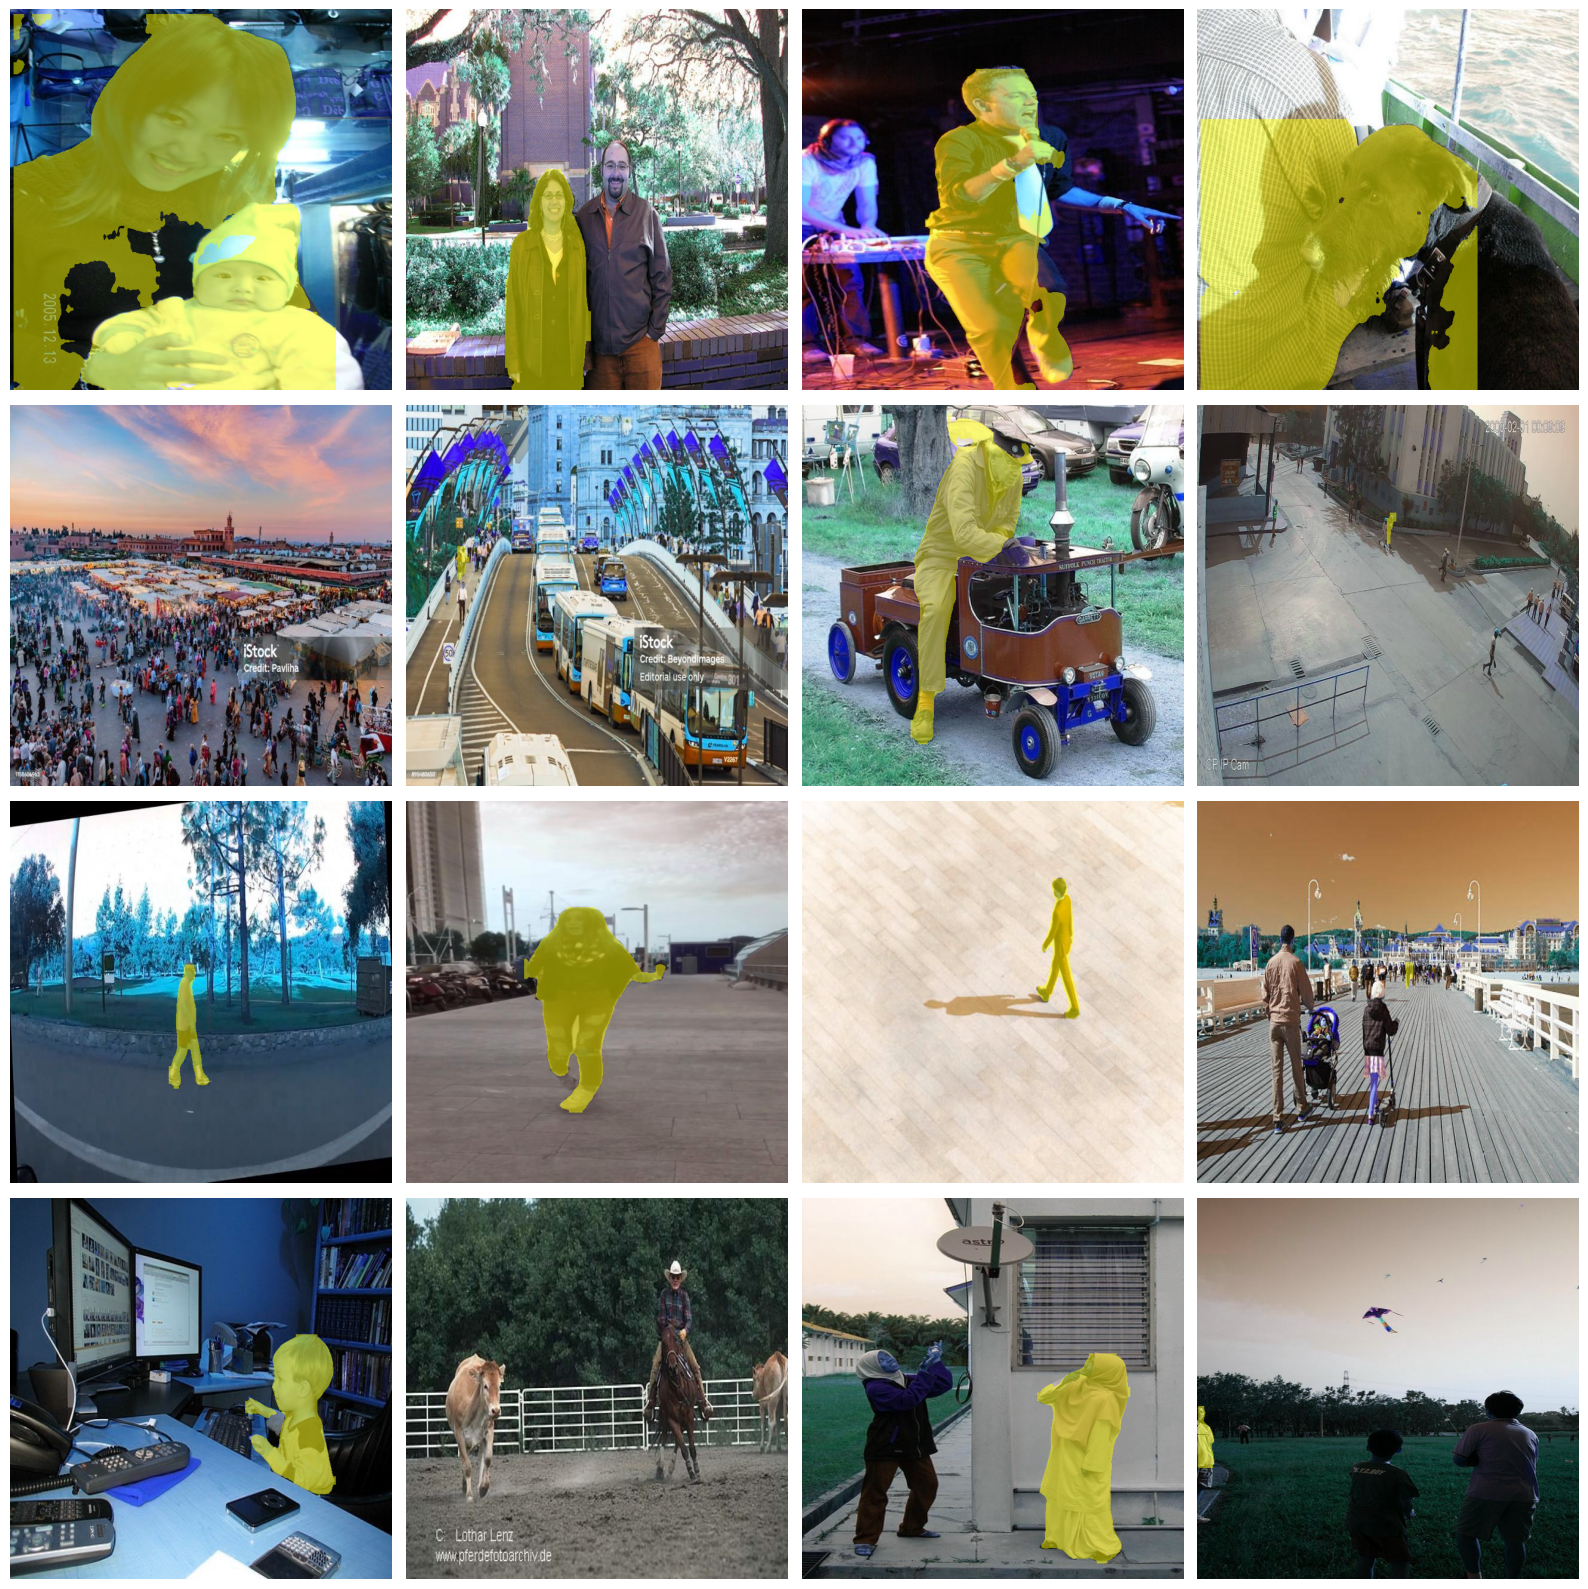

In [10]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import os
import random

# Load trained model
model = YOLO('runs/segment/Person_Segmentation_Datasets_yolov8/weights/best.pt')

# Test images directory
test_images_dir = 'datasets/Person_Segmentation_Datasets/test/images'

# Define colors for visualization
color_sample = {
    0 : (0, 0, 0),
    1 : (0, 255, 255),      # Green
}

image_files = os.listdir(test_images_dir)

# Plot settings
fig, ax = plt.subplots(4, 4, figsize=(16, 16))
ax = ax.ravel()

for idx in range(16):
    img_name = random.choice(image_files)
    img_path = os.path.join(test_images_dir, img_name)
    image = cv2.imread(img_path)
    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Perform inference
    results = model(img_path)[0]
    # print(results)

    if results.masks:
      # Draw segmentation masks
      for seg in results.masks.data:
          mask = seg.cpu().numpy()
          # Resize mask to match image dimensions
          mask_resized = cv2.resize(mask, (image.shape[1], image.shape[0]))
          image = draw_segmentation(image_rgb, mask_resized, color_sample)

    # Convert BGR to RGB for plotting
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Plot the image
    ax[idx].imshow(image_rgb)
    ax[idx].axis('off')

plt.tight_layout()
plt.show()
